In [30]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import signal
import math
from scipy.interpolate import make_interp_spline, BSpline

# Processing of the resample image

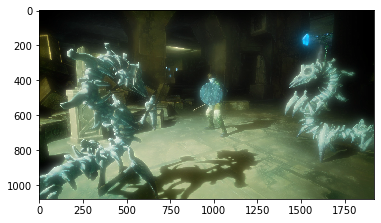

In [31]:
im_file = "./laplacian_pyramid.jpg"
im = cv2.imread(im_file)
plt.imshow(im)

(1080, 1920)


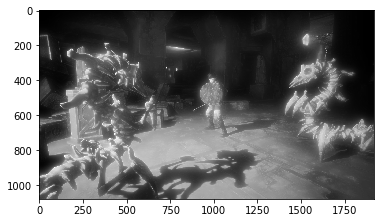

In [32]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(im.shape)
plt.imshow(im, cmap='gray')

In [33]:
dx, dy = cv2.spatialGradient(im)
print(dx.shape)
print(np.min(dx))
print(np.max(dx))
print(np.min(dy))
print(np.max(dy))

(1080, 1920)
-698
725
-628
594


True

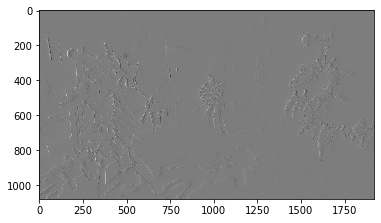

In [34]:
plt.imshow(dx, cmap='gray')
cv2.imwrite("./laplacian_pyramid/im_dx.jpg", dx)

True

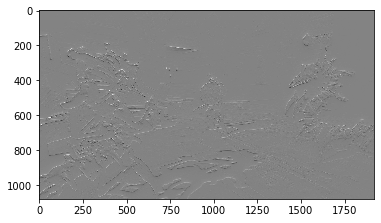

In [35]:
plt.imshow(dy, cmap='gray')
cv2.imwrite("./laplacian_pyramid/im_dy.jpg", dy)

True

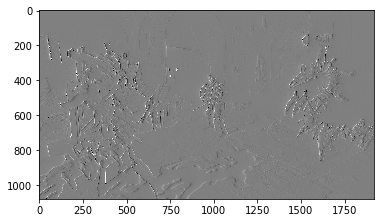

In [36]:
dx_amp = dx * 100
plt.imshow(dx_amp, cmap='gray')
cv2.imwrite("./laplacian_pyramid/im_dx_amp.jpg", dx_amp)

True

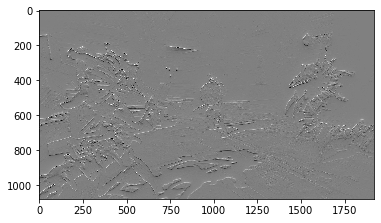

In [37]:
dy_amp = dy * 100
plt.imshow(dy_amp, cmap='gray')
cv2.imwrite("./laplacian_pyramid/im_dy_amp.jpg", dy_amp)

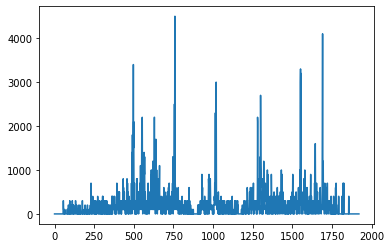

In [38]:
plt.plot(abs(dx_amp[40]))
plt.savefig("./laplacian_pyramid/dx_amp[40]")

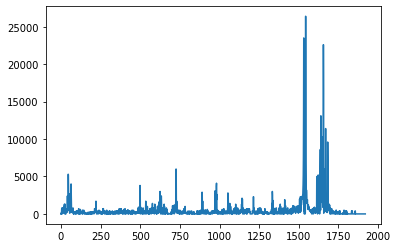

In [39]:
plt.plot(abs(dx_amp[140]))
plt.savefig("./laplacian_pyramid/dx_amp[140]")

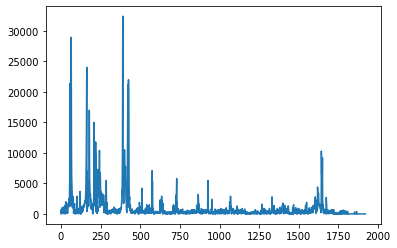

In [40]:
plt.plot(abs(dx_amp[240]))
plt.savefig("./laplacian_pyramid/dx_amp[240]")

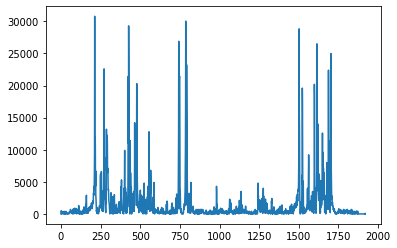

In [41]:
plt.plot(abs(dx_amp[340]))
plt.savefig("./laplacian_pyramid/dx_amp[340]")

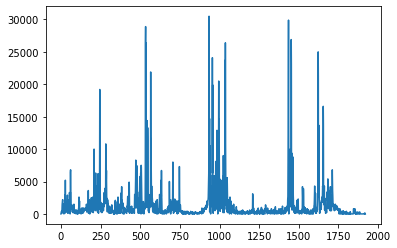

In [42]:
# In the area of high resolution
plt.plot(abs(dx_amp[440]))
plt.savefig("./laplacian_pyramid/dx_amp[440]")

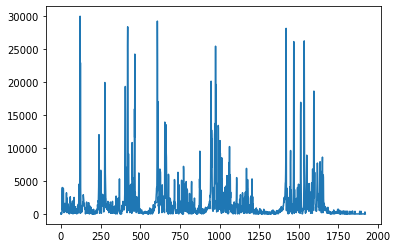

In [43]:
# In the area of high resolution
plt.plot(abs(dx_amp[540]))
plt.savefig("./laplacian_pyramid/dx_amp[540]")

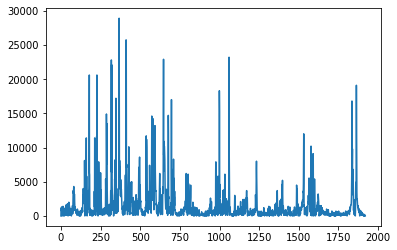

In [44]:
# In the area of high resolution
plt.plot(abs(dx_amp[640]))
plt.savefig("./laplacian_pyramid/dx_amp[640]")

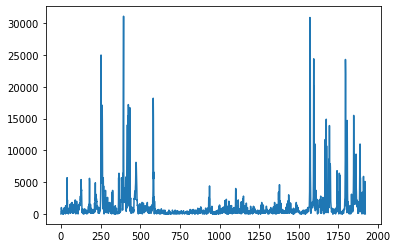

In [45]:
plt.plot(abs(dx_amp[740]))
plt.savefig("./laplacian_pyramid/dx_amp[740]")

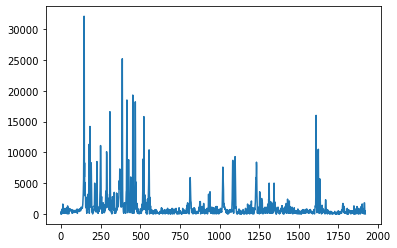

In [46]:
plt.plot(abs(dx_amp[840]))
plt.savefig("./laplacian_pyramid/dx_amp[840]")

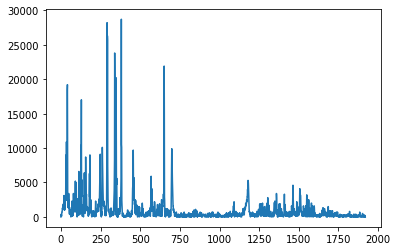

In [47]:
plt.plot(abs(dx_amp[940]))
plt.savefig("./laplacian_pyramid/dx_amp[940]")

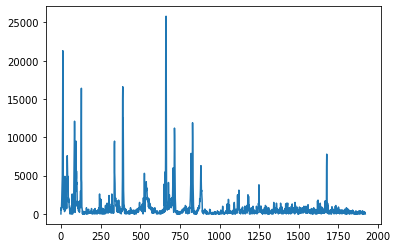

In [48]:
plt.plot(abs(dx_amp[1040]))
plt.savefig("./laplacian_pyramid/dx_amp[1040]")

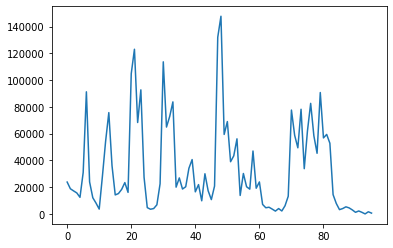

In [49]:
interval = 20
list = []
sum = 0
for i in range(1920):
    sum += abs(dx_amp[540][i])
    if (i % interval == (interval - 1)):
        list.append(sum)
        sum = 0
plt.plot(list)

# Comparison of average gradient intensity in high/low resolution area

In [50]:
print(dx_amp.shape)
print(dy_amp.shape)

(1080, 1920)
(1080, 1920)


In [51]:
ct_low_x = 0
ct_high_x = 0

sum_low_x = 0
sum_high_x = 0

for i in range(1080):
    for j in range(1920):
        if ((i in range(405, 675)) and (j in range(720, 1200))):
            ct_high_x += 1
            sum_high_x += abs(dx_amp[i][j])
        else:
            ct_low_x += 1
            sum_low_x += abs(dx_amp[i][j])

In [52]:
avg_intensity_low_x = sum_low_x / ct_low_x
avg_intensity_high_x = sum_high_x / ct_high_x
print(avg_intensity_low_x)
print(avg_intensity_high_x)

1105.5656378600822
1420.0811419753086


In [53]:
ct_low_y = 0
ct_high_y = 0

sum_low_y = 0
sum_high_y = 0

for i in range(1080):
    for j in range(1920):
        if ((i in range(405, 675)) and (j in range(720, 1200))):
            ct_high_y += 1
            sum_high_y += abs(dy_amp[i][j])
        else:
            ct_low_y += 1
            sum_low_y += abs(dy_amp[i][j])

In [54]:
avg_intensity_low_y = sum_low_y / ct_low_y
avg_intensity_high_y = sum_high_y / ct_high_y
print(avg_intensity_low_y)
print(avg_intensity_high_y)

1297.235074074074
1482.3766975308642


In [55]:
print(avg_intensity_high_x / avg_intensity_low_x)
print(avg_intensity_high_y / avg_intensity_low_y)

1.2844837912328735
1.1427201801407803


[1600.83229025 1035.0026087  1000.49119342 1108.25985438]


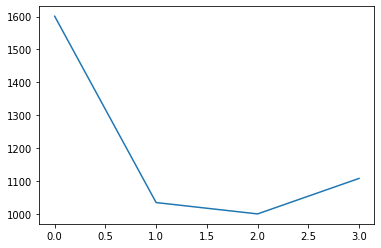

In [56]:
ct = np.array([0, 0, 0, 0])
sum = np.array([0, 0, 0, 0])
w = 30

for i in range(1080):
    for j in range(1920):
        if ((i in range(405 + w, 675 - w)) and (j in range(720 + w, 1200 - w))):
            ct[0] += 1
            sum[0] += abs(dx_amp[i][j])
        elif ((i in range(405, 675)) and (j in range(720, 1200))):
            ct[1] += 1
            sum[1] += abs(dx_amp[i][j])
        elif ((i in range(405 - w, 675 + w)) and (j in range(720 - w, 1200 + w))):
            ct[2] += 1
            sum[2] += abs(dx_amp[i][j])
        else:
            ct[3] += 1
            sum[3] += abs(dx_amp[i][j])
avg = sum / ct
print(avg)
plt.plot(avg)

[1475.54510589  863.47683924 1050.75032637 1105.91341503]


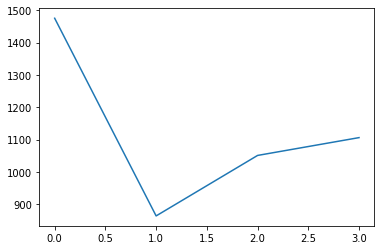

In [57]:
ct = np.array([0, 0, 0, 0])
sum = np.array([0, 0, 0, 0])
w = 8

for i in range(1080):
    for j in range(1920):
        if ((i in range(405 + w, 675 - w)) and (j in range(720 + w, 1200 - w))):
            ct[0] += 1
            sum[0] += abs(dx_amp[i][j])
        elif ((i in range(405, 675)) and (j in range(720, 1200))):
            ct[1] += 1
            sum[1] += abs(dx_amp[i][j])
        elif ((i in range(405 - w, 675 + w)) and (j in range(720 - w, 1200 + w))):
            ct[2] += 1
            sum[2] += abs(dx_amp[i][j])
        else:
            ct[3] += 1
            sum[3] += abs(dx_amp[i][j])
avg = sum / ct
print(avg)
plt.plot(avg)